Data Mining: Basic Concepts - Winter 2023/24
---------------
``` 
> University of Konstanz 
> Department of Computer and Information Science
> Maximilian T. Fischer, Frederik Dennig, Yannick Metz, Udo Schlegel
```
__Organize in teams of 2 people, return the exercise on time using ILIAS__

---

Assignment 9 in Python
---------------
- ___Please put your names and student IDs here___:
    - Wei-Cheng Lin, 01/1348028
    - Kuon Ito, 01/1358810

---

#### Exercise 1:  K-means 

Perform k-means clustering with k=3 using the Euclidean distance by hand. Assume that initial clusters centroids are:

* Cluster 1: Record # 1
* Cluster 2: Record # 5
* Cluster 3: Record # 10

Compute for every iteration the updated cluster prototypes and state to which cluster each point is assigned after each iteration. 

_Note: In this exercise, you don’t need to normalize the data._

|ID|X1|X2|X3|X4|X5|
|-----|--------|-----------|-----------------|--------------|----|
|1|0.58|0.26|0.38|0.73|0.65|
|2|0.50|0.21|0.34|0.61|0.61|
|3|0.92|0.80|0.70|0.60|0.61|
|4|0.51|0.29|0.37|0.54|0.69|
|5|0.18|0.23|0.92|0.25|0.26|
|6|0.12|0.23|0.18|0.30|0.25|
|7|0.90|0.85|0.75|0.60|0.63|
|8|0.01|0.16|0.15|0.28|0.31|
|9|0.44|0.25|0.35|0.59|0.64|
|10|0.91|0.83|0.81|0.55|0.46|

_(Hint: you can use the ``![](imagename.png)`` to include a image in a markdown cell. You can use this to include a hand written calculation. Do not forget to also upload the image in your final submission.)_

![1](exercise1.jpg)

---

#### Exercise 3: Expectation Maximization (EM) Algorithm 

The sklearn class `GaussianMixture`can be used to compute the EM algorithm. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.mixture import GaussianMixture

##### __(a) Cluster the `em-data.csv` data. Describe each step and reason your parameter choices.__

AttributeError: 'NoneType' object has no attribute 'split'

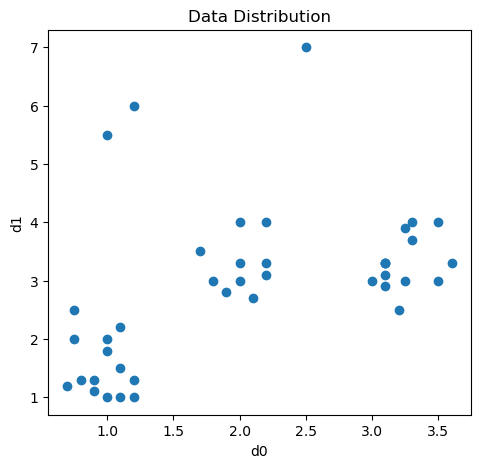

In [2]:
data = pd.read_csv('em-data.csv')

# Scatter plot of data distribution
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(data["d0"], data["d1"])
plt.xlabel('d0')
plt.ylabel('d1')
plt.title('Data Distribution')

n_components = range(1, 12)
models = [GaussianMixture(n, random_state=0).fit(data) for n in n_components]
bic_scores = [model.bic(data) for model in models]

plt.subplot(1, 2, 2)
plt.plot(n_components, bic_scores, label='BIC')
plt.legend()
plt.xlabel('Number of Components')
plt.ylabel('Score')
plt.title('BIC Scores')

plt.tight_layout()
plt.show()

# Initializing and fitting a Gaussian Mixture Model
gmm = GaussianMixture(n_components=4) # Based on the BIC scores
gmm.fit(data)

# Predicting cluster labels and updating the DataFrame
labels = gmm.predict(data)
frame = pd.DataFrame(data)
frame['cluster'] = labels
frame.columns = ['d0', 'd1', 'cluster']

```
In the BIC plot, the point where the curve starts to flatten is considered a point of diminishing returns(in the case, 4). This often indicates the optimal number of components where adding more components does not significantly improve the fit to the data.

##### __(b) Visualize your results in a 2D plot.__

In [ ]:
for k in range(0,4):
    data = frame[frame["cluster"]==k]
    plt.scatter(data["d0"],data["d1"])
    
plt.title('Gaussian Mixture Model')
plt.xlabel('d0')
plt.ylabel('d1')
plt.figure(figsize=(6, 5))
plt.show()
frame

#### Exercise 2: Partitioning Around Medoids (PAM) 

Load the `USArrests.csv` dataset and the following methods which can be used to compute PAM. Please install the `pyclustering` package. 

_(Hint: Use only the following imports)_

In [ ]:
import pandas as pd 
import numpy as np 
from pyclustering.cluster.kmedoids import kmedoids
from scipy.spatial.distance import pdist, cdist, squareform
import matplotlib.pyplot as plt
from random import randrange

In [ ]:
data = pd.read_csv("USArrests.csv")
print(data.head())

##### __(a) Standardize the columns of the "USArrests" dataset. Explain why we have to standardize the dataset?__

In [ ]:
numerical_columns = data.select_dtypes(include=np.number).columns

for column in numerical_columns:
    mean = data[column].mean()
    std_dev = data[column].std()
    data[column] = (data[column] - mean) / std_dev

print("\nStandardized Data:")
print(data.head())

```
(1)Standardizing variables ensures that each feature contributes equally to the clustering process.

(2)Standardized values are on a common scale, making it easier to interpret the relative importance of each variable in the clustering analysis.

(3)Clustering algorithms, including PAM, often rely on distance measures. Standardizing features can improve the convergence speed of the algorithms.

(4)Standardization reduces the impact of outliers during the clustering process.
```

##### __(b) Compute the PAM (`kmedoids`) using `k = 4`. List the cluster and cluster medoids. Describe and explain the results.__

In [ ]:
data_array = data.select_dtypes(include=np.number).to_numpy()

num_clusters = 4

initial_medoids = [randrange(data_array.shape[0]) for _ in range(num_clusters)]
kmedoids_instance = kmedoids(data_array, initial_medoids)
kmedoids_instance.process()

clusters = kmedoids_instance.get_clusters()

for cluster_id, cluster in enumerate(clusters):
    cluster_data = data_array[cluster, :]
    medoid = data_array[kmedoids_instance.get_medoids()[cluster_id], :]

    print(f"Cluster {cluster_id + 1}:")
    print(f"Data Points: {cluster}")
    print(f"Medoid: {medoid}")
    print()

```
In Partitioning Around Medoids (PAM), each cluster is characterized by its medoid. The medoid is selected as the data point that has the smallest total dissimilarity to all other points in the cluster. Therefore, we can understand the cluter by evaluating the values of the Medoid.

For example: 
The Medoid of Cluster 1(1.24256408  0.78283935 -0.52090661 -0.00341647) has positive values for the first two features and a negative value for the third feature. This indicates higher crime rates in states with a smaller population.
```

##### __(c) Define a Python method to compute the measure for the compactness of a PAM clustering. The parameters of the method is the data and the instance of the kmedoids class (`kmedoids_instance`).__

$$TD=\sum\limits^k_{i = 1} TD(C_i) \text{ and } TD(C) = \sum\limits_{p \in C} dist(p, m_c)$$

The medoid $m_c$ is the representative element of the cluster. 

_(Hint: Use the `pdist` or `cdist` method to compute the pairwise distance between $p$ and $m_c$)_

In [ ]:
def compute_compactness_measure(data, kmedoids_instance):
    clusters = kmedoids_instance.get_clusters()
    medoids = kmedoids_instance.get_medoids()

    total_compactness = 0.0

    for cluster_id, cluster in enumerate(clusters):
        cluster_data = data[cluster, :]
        medoid = data[medoids[cluster_id], :]

        compactness_cluster = np.sum(cdist(cluster_data, [medoid]))

        total_compactness += compactness_cluster

    return total_compactness

compactness_measure = compute_compactness_measure(data_array, kmedoids_instance)
print(f"Compactness Measure: {compactness_measure}")

##### __(d) Use the newly defined function to compute TD of PAM $k = 3$.__

In [ ]:
num_clusters = 3

initial_medoids = [randrange(data.shape[0]) for _ in range(num_clusters)]

kmedoids_instance = kmedoids(data_array, initial_medoids)
kmedoids_instance.process()

total_compactness_measure = compute_compactness_measure(data_array, kmedoids_instance)
print(f'TD for PAM clustering with k = 3: {total_compactness_measure}')

##### __(e) Compute the TD's for PAM with $k = 1, \dots, 10$ and plot the results. Explain the results of the plot.__

In [ ]:
num_clusters_list = list(range(1, 11))
compactness_measures = []

for num_clusters in num_clusters_list:
    initial_medoids = [randrange(data_array.shape[0]) for _ in range(num_clusters)]
    kmedoids_instance = kmedoids(data_array, initial_medoids)
    kmedoids_instance.process()

    compactness_measure = compute_compactness_measure(data_array, kmedoids_instance)
    compactness_measures.append(compactness_measure)

plt.plot(num_clusters_list, compactness_measures, marker='o')
plt.title('Total Dispersion (TD) vs. Number of Clusters (k) in PAM')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Total Dispersion (TD)')
plt.show()

```
> As the number of clusters increases, each cluster becomes more compact, resulting in a reduction of the total dispersion. This indicates that the clusters are better capturing the patterns present in the data.
```

---

***<span style="color:green">Grade: Green</span>***
